# Questions to the data
1. Does the number of hauses in all houses groups remain stable or there were a construction side finished in the given time frame?
2. What was the weather in the region?
3. What was the price for gas/oil/elictricity?

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import List, Tuple, Any

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/public_data/train.csv')

In [3]:
data.head()

,pseudo_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2019-08-28 19:00:00,2019-08-28 19:30:00,2019-08-28 20:00:00,2019-08-28 20:30:00,2019-08-28 21:00:00,2019-08-28 21:30:00,2019-08-28 22:00:00,2019-08-28 22:30:00,2019-08-28 23:00:00,2019-08-28 23:30:00
0,0x16cb02173ebf3059efdc97fd1819f14a2,45.023,39.9850,36.5695,34.7480,35.972,38.439,36.591,36.3155,32.6605,...,24.2880,23.994,26.1995,25.0270,23.0665,26.093,23.4295,25.4715,26.246,22.6020
1,0x1c9d08cd16fce04790ef900695861e786,2.931,1.6410,2.2600,2.2730,2.651,3.137,2.532,3.1420,2.5280,...,2.5700,1.446,1.5230,1.5630,2.5880,2.190,1.4860,2.5270,2.288,1.7940
2,0x1612e4cbe3b1b85c3dbcaeaa504ee8424,11.014,12.6525,10.8240,13.7485,12.383,12.342,13.413,11.4840,11.5105,...,6.3565,5.766,5.4955,5.0885,6.8140,7.492,5.7705,6.8240,6.072,6.7205
3,0x20158d36236a640cf0524dba149459169,55.813,49.0400,49.0950,41.1330,45.660,48.477,50.539,45.7370,42.6800,...,32.6460,30.439,30.2470,31.2660,34.3390,33.076,33.1080,33.7260,30.009,34.8400
4,0xc305005dcb1ed6128d816954c5ab9e7e,26.925,28.1180,25.6000,28.0910,26.530,23.858,26.556,27.7140,23.1740,...,13.3980,13.280,13.7340,13.6060,14.7000,16.290,15.1240,15.3650,14.360,13.9350


In [4]:
# drop index for feature preparation
data_ = data.drop(columns='pseudo_id')
# convert dates to pandas datetime
data_.columns = [datetime.strptime(c, "%Y-%m-%d %H:%M:%S") for c in data_.columns]
data_.head()

,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,...,2019-08-28 19:00:00,2019-08-28 19:30:00,2019-08-28 20:00:00,2019-08-28 20:30:00,2019-08-28 21:00:00,2019-08-28 21:30:00,2019-08-28 22:00:00,2019-08-28 22:30:00,2019-08-28 23:00:00,2019-08-28 23:30:00
0,45.023,39.9850,36.5695,34.7480,35.972,38.439,36.591,36.3155,32.6605,0.1420,...,24.2880,23.994,26.1995,25.0270,23.0665,26.093,23.4295,25.4715,26.246,22.6020
1,2.931,1.6410,2.2600,2.2730,2.651,3.137,2.532,3.1420,2.5280,0.0000,...,2.5700,1.446,1.5230,1.5630,2.5880,2.190,1.4860,2.5270,2.288,1.7940
2,11.014,12.6525,10.8240,13.7485,12.383,12.342,13.413,11.4840,11.5105,0.0455,...,6.3565,5.766,5.4955,5.0885,6.8140,7.492,5.7705,6.8240,6.072,6.7205
3,55.813,49.0400,49.0950,41.1330,45.660,48.477,50.539,45.7370,42.6800,0.0000,...,32.6460,30.439,30.2470,31.2660,34.3390,33.076,33.1080,33.7260,30.009,34.8400
4,26.925,28.1180,25.6000,28.0910,26.530,23.858,26.556,27.7140,23.1740,0.0000,...,13.3980,13.280,13.7340,13.6060,14.7000,16.290,15.1240,15.3650,14.360,13.9350


# GROUP BY DAY

In [5]:
# Aggregate energy use values per day
data_ = data_.T.groupby(data_.T.index.date).sum()
data_.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,23.534,313.948,196.943,36.989,153.074,19.533,80.263,175.5120,40.8825,112.112
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,32.657,190.435,153.460,42.530,104.633,20.703,69.607,140.6670,31.2955,92.511
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,15.138,110.994,88.819,33.476,79.647,14.527,38.887,108.7145,29.8745,64.486
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,19.211,55.876,78.585,30.363,75.137,16.648,53.533,117.0440,33.0020,54.094
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,10.200,57.125,79.498,30.640,76.458,17.598,48.185,119.8990,37.0340,48.022


In [6]:
# features["hour"] = data.index.hour
data_.columns = [c+1 for c in range(len(data_.columns))]
data_.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,23.534,313.948,196.943,36.989,153.074,19.533,80.263,175.5120,40.8825,112.112
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,32.657,190.435,153.460,42.530,104.633,20.703,69.607,140.6670,31.2955,92.511
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,15.138,110.994,88.819,33.476,79.647,14.527,38.887,108.7145,29.8745,64.486
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,19.211,55.876,78.585,30.363,75.137,16.648,53.533,117.0440,33.0020,54.094
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,10.200,57.125,79.498,30.640,76.458,17.598,48.185,119.8990,37.0340,48.022


In [7]:
# check wether datetime in ascending order , it is important for time series
print(data_.index.is_monotonic)

True


In [8]:
# Set dates for development phase
new_date_range = pd.date_range(start="2017-01-01", end="2019-03-31", freq="D")
# Add test dates in the data frame
data_ = data_.reindex(new_date_range)
# using dummy values in test set , fill_value = 100
# df_ = df_.T

#data_.head()

In [9]:
# saving indexes for next steps
idx_test_date = data_.index[data_[1].isna()]
idx_test_date

DatetimeIndex(['2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-03-25',
               '2017-03-26', '2017-03-27',
               ...
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-03-15',
               '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21'],
              dtype='datetime64[ns]', length=126, freq=None)

In [10]:
data_ = data_.fillna(method="backfill")

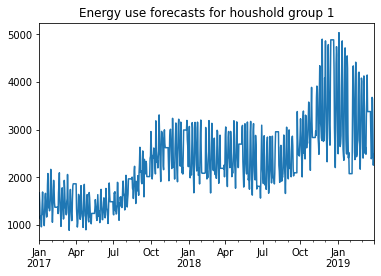

In [19]:
#plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':160})
#data_[1].plot()
#plt.title('Energy use forecasts for houshold group' + " 1")
#plt.show()

In [134]:
data_\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / data_.shape[0])\
    .rename(columns={0: 'Number of missed data  points', 'perc': '% of missed data points'})

,Number of missed data points,% of missed data points
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
...,...,...
57,0,0.0
58,0,0.0
59,0,0.0
60,0,0.0


# Adding features

In [11]:
df = data_.copy(deep=True)
#df.drop(columns=['ord_mean_week','mean','std'],inplace=True)
df["weekday"] = data_.index.weekday
df["dayofyear"] = data_.index.dayofyear

In [12]:
df["is_weekend"] = data_.index.weekday.isin([5, 6]).astype(np.int32)
#df["weekofyear"] = data_.index.isocalendar
df["month"] = data_.index.month
df["season"] = (data_.index.month % 12 + 3) // 3

In [66]:
df

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,weekday,dayofyear,is_weekend,month,season
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,19.533,80.263,175.5120,40.8825,112.112,6,1,1,1,1
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,20.703,69.607,140.6670,31.2955,92.511,0,2,0,1,1
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,14.527,38.887,108.7145,29.8745,64.486,1,3,0,1,1
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,16.648,53.533,117.0440,33.0020,54.094,2,4,0,1,1
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,17.598,48.185,119.8990,37.0340,48.022,3,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,3645.0890,261.033,888.2270,4306.199,2333.272,977.487,396.773,2270.9935,3310.6490,876.527,...,62.912,170.326,326.4415,104.3700,234.116,2,86,0,3,2
2019-03-28,2997.3715,218.526,547.1220,3472.952,1808.689,833.654,326.882,1794.9220,2686.1380,686.604,...,50.026,116.868,239.2755,82.4725,158.289,3,87,0,3,2
2019-03-29,2254.1045,170.737,353.0045,2631.766,1484.601,615.075,222.557,1345.3830,2010.5790,540.393,...,42.464,98.505,188.1385,57.4490,123.610,4,88,0,3,2
2019-03-30,2491.5945,147.279,328.3965,2924.391,1562.029,689.869,244.147,1405.5355,2269.1055,609.478,...,41.900,117.733,216.9915,61.2640,117.921,5,89,1,3,2


In [13]:
def create_features(houshold_id,df=df) -> pd.DataFrame:
    df_new = df[[houshold_id, "weekday", "dayofyear", "is_weekend", "season", "month"]]
    df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
    df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
    df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
    df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
    df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
    df_new['lag_4'] = df_new[houshold_id].shift(4).fillna(method="backfill")
    df_new['lag_5'] = df_new[houshold_id].shift(5).fillna(method="backfill")
    df_new['lag_6'] = df_new[houshold_id].shift(6).fillna(method="backfill")
    df_new['lag_7'] = df_new[houshold_id].shift(7).fillna(method="backfill")
    return df_new

In [28]:
#result = create_features(1)

/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_36440/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_36440/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_36440/3561779689.py:5: SettingWithCop

In [14]:
def get_weeks(idx)-> List[List[pd._libs.tslibs.timestamps.Timestamp]]:
    idx = list(idx)
    count = 0
    weeks_to_predict = []
    week = []
    for i in range(len(idx)):
        if count > 6:
            weeks_to_predict.append(week)
            week = []
            count = 0
        week.append(idx[i])
        count += 1
    return weeks_to_predict

In [15]:
weeks_test_date = get_weeks(idx_test_date)

In [33]:
def data_split(result, weeks, n) -> Tuple[Any, Any]:
    # n test week number
    if n == 0:
        result = result[result.index < weeks[n][0]]
    elif n > 0:
        """
        TODO:
            - change split in a way that previous dates are accumulated with new predictions 
        """
        result = result[(result.index > weeks[n-1][6]) & (result.index < weeks[n][0])]
    train_linear, test_linear = train_test_split(result, shuffle = False, test_size = 0.15)
    return train_linear, test_linear

In [34]:
result_splitted = []
for i in range(len(weeks_test_date)):
    train_linear, test_linear = data_split(result, weeks_test_date, i)
    result_splitted.append([train_linear, test_linear])

In [37]:
result_splitted[0][1]

,1,weekday,dayofyear,is_weekend,season,month,std,mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
2017-02-02,1056.1095,3,33,0,1,2,404.785860,1609.481357,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790,1348.1640,1296.3925
2017-02-03,1290.8265,4,34,0,1,2,411.479861,1601.290286,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790,1348.1640
2017-02-04,1737.6175,5,35,1,1,2,412.199046,1603.267214,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790
2017-02-05,1935.3125,6,36,1,1,2,366.345664,1570.290643,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485
2017-02-06,1807.4465,0,37,0,1,2,313.865940,1531.353000,1935.3125,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100
2017-02-07,1468.2410,1,38,0,1,2,314.785816,1523.990857,1807.4465,1935.3125,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760


In [37]:
features_train_linear = result_splitted[0][0].drop([1], axis=1)
features_valid_linear = result_splitted[0][1].drop([1], axis=1)
target_train_linear = result_splitted[0][0][1]
target_valid_linear = result_splitted[0][1][1]

In [38]:
model_linear = LinearRegression()
model_linear.fit(features_train_linear,target_train_linear)

LinearRegression()

In [39]:
predict = model_linear.predict(features_valid_linear)

In [40]:
print("RMSE тестовой выборки: ", mean_squared_error(target_valid_linear,predict, squared=False))

RMSE тестовой выборки:  254.98388264044218


In [41]:
target_valid_linear= target_valid_linear.to_frame()

In [42]:
target_valid_linear['predict'] = predict

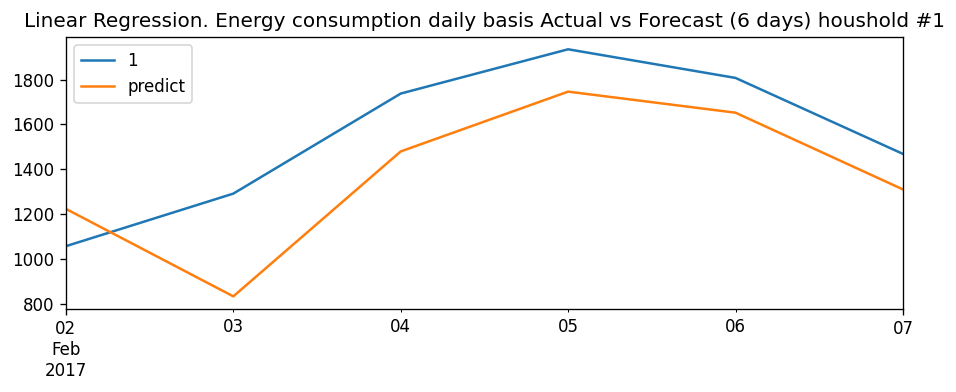

In [43]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
target_valid_linear.plot()
plt.title('Linear Regression. Energy consumption daily basis Actual vs Forecast (6 days) houshold #1')
plt.show()

In [45]:
target_valid_linear

,1,predict
2017-02-02,1056.1095,1222.626666
2017-02-03,1290.8265,831.952840
2017-02-04,1737.6175,1479.236409
2017-02-05,1935.3125,1746.210711
2017-02-06,1807.4465,1652.165591
2017-02-07,1468.2410,1309.573911


In [44]:
def get_test_predictions(result, week) -> pd.DataFrame:
    test_week = result[week[0]:week[6]]
    features_test_linear = test_week.drop([1], axis=1)
    target_test_linear = test_week[1]
    target_test_linear= target_test_linear.to_frame()
    predict_test = model_linear.predict(features_test_linear)
    target_test_linear['predict'] = predict_test

    return target_test_linear

In [45]:
week = weeks_test_date[0]
predict_test = get_test_predictions(result,week)
predict_test

,1,predict
2017-02-08,1371.646,1147.506122
2017-02-09,1371.646,1295.524195
2017-02-10,1371.646,1232.622930
2017-02-11,1371.646,1518.513109
2017-02-12,1371.646,1497.759138
2017-02-13,1371.646,1583.406886
2017-02-14,1371.646,1485.613948


In [48]:
week = weeks_test_date[0]
result_2 = result.copy(deep=True)

result_2.loc[week[0]:week[6],1] = predict_test['predict']


In [49]:
result_2.loc[week[0]:week[6],1]

2017-02-08    1147.506122
2017-02-09    1295.524195
2017-02-10    1232.622930
2017-02-11    1518.513109
2017-02-12    1497.759138
2017-02-13    1583.406886
2017-02-14    1485.613948
Freq: D, Name: 1, dtype: float64

In [17]:
def data_split_accumlated(result, weeks, n, houshold) -> Tuple[Any, Any]:
    print(weeks[n])
    result_splitted = result[result.index < weeks[n][0]]
    result_splitted_features = result_splitted.drop([houshold], axis=1)
    result_splitted_target = result_splitted[houshold]
    print("target: ", result_splitted_target)
    result_splitted_to_predict = result[(result.index >= weeks[n][0]) & (result.index <= weeks[n][6])]
    result_splitted_to_predict_features = result_splitted_to_predict.drop([houshold], axis=1)
    result_splitted_to_predict_target = result_splitted_to_predict[houshold]
    result_splitted_to_predict_target = result_splitted_to_predict_target.to_frame()

    return result_splitted_features, result_splitted_target, result_splitted_to_predict_features, result_splitted_to_predict_target

In [21]:
all_predictions = []

for houshold in data_.columns:
    houshold_predictions = []
    print("***** Houshold " + str(houshold) + " dataset created ****** ")
    for week in range(len(weeks_test_date)):
        #print("week "+  str(week) + " splitting started")
        result = create_features(houshold)
        features, target, features_predict, target_predict = data_split_accumlated(result, weeks_test_date, week, houshold)
        model_linear = LinearRegression()
        model_linear.fit(features, target)
        print("trained on " + str(week))
        prediction = model_linear.predict(features_predict)
        houshold_predictions.append(prediction)
        week_timestamps = weeks_test_date[week]
        target_predict['predict'] = prediction
        df.loc[week_timestamps[0]:week_timestamps[6],houshold] = target_predict['predict']
        print("=============================================")
        print(prediction)
        #print(df.loc[week_timestamps[0]:week_timestamps[6],houshold])
        print("=============================================")
    all_predictions.append(houshold_predictions)

***** Houshold 1 dataset created ****** 
week 0 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCop

[Timestamp('2017-02-08 00:00:00'), Timestamp('2017-02-09 00:00:00'), Timestamp('2017-02-10 00:00:00'), Timestamp('2017-02-11 00:00:00'), Timestamp('2017-02-12 00:00:00'), Timestamp('2017-02-13 00:00:00'), Timestamp('2017-02-14 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
2017-01-06     960.3085
2017-01-07    1206.6970
2017-01-08    1434.7410
2017-01-09    1691.1110
2017-01-10    1364.7680
2017-01-11    1205.7855
2017-01-12    1255.7920
2017-01-13     984.8050
2017-01-14    1230.0850
2017-01-15    1577.9875
2017-01-16    1662.5150
2017-01-17    1477.8875
2017-01-18    1259.0465
2017-01-19    1164.7385
2017-01-20    1211.8320
2017-01-21    1837.0090
2017-01-22    2078.1550
2017-01-23    1751.2935
2017-01-24    1362.2485
2017-01-25    1371.5805
2017-01-26    1296.3925
2017-01-27    1348.1640
2017-01-28    1723.7790
2017-01-29    2166.1485
2017-01-30    2080.0100
2017-01-31    1519.7760
2017-02-

/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_5'] = df_new[houshold_id].shift(5).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_6'] = df_new[houshold_id].shift(6).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:11: SettingWithCopyWarning: 
A

[Timestamp('2017-03-25 00:00:00'), Timestamp('2017-03-26 00:00:00'), Timestamp('2017-03-27 00:00:00'), Timestamp('2017-03-28 00:00:00'), Timestamp('2017-03-29 00:00:00'), Timestamp('2017-03-30 00:00:00'), Timestamp('2017-03-31 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-03-20    1253.7345
2017-03-21    1090.8350
2017-03-22    1094.7495
2017-03-23    1545.9775
2017-03-24    1822.8095
Freq: D, Name: 1, Length: 83, dtype: float64
trained on 1
[1770.85414841 1611.8661904  1495.03730964 1571.85726706 1809.82681897
 2033.31191674 2103.06877628]
2017-03-25    1770.854148
2017-03-26    1611.866190
2017-03-27    1495.037310
2017-03-28    1571.857267
2017-03-29    1809.826819
2017-03-30    2033.311917
2017-03-31    2103.068776
Freq: D, Name: 1, dtype: float64
week 2 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is 

[Timestamp('2017-05-09 00:00:00'), Timestamp('2017-05-10 00:00:00'), Timestamp('2017-05-11 00:00:00'), Timestamp('2017-05-12 00:00:00'), Timestamp('2017-05-13 00:00:00'), Timestamp('2017-05-14 00:00:00'), Timestamp('2017-05-15 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-05-04    1570.3975
2017-05-05    1373.8285
2017-05-06    1147.0650
2017-05-07    1136.1875
2017-05-08    1023.5425
Freq: D, Name: 1, Length: 128, dtype: float64
trained on 2
[1185.98518646 1430.77907108 1368.54972441 1303.00921251 1282.01853942
 1278.70174762 1355.699309  ]
2017-05-09    1185.985186
2017-05-10    1430.779071
2017-05-11    1368.549724
2017-05-12    1303.009213
2017-05-13    1282.018539
2017-05-14    1278.701748
2017-05-15    1355.699309
Freq: D, Name: 1, dtype: float64
week 3 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCop

[Timestamp('2017-06-23 00:00:00'), Timestamp('2017-06-24 00:00:00'), Timestamp('2017-06-25 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-06-27 00:00:00'), Timestamp('2017-06-28 00:00:00'), Timestamp('2017-06-29 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-06-18    1030.8480
2017-06-19    1239.2365
2017-06-20    1582.8925
2017-06-21    1880.3180
2017-06-22    1649.5310
Freq: D, Name: 1, Length: 173, dtype: float64
trained on 3
[1327.90750365 1290.793351   1387.83054566 1561.37801933 1663.53659728
 1727.9305153  1688.0067937 ]
2017-06-23    1327.907504
2017-06-24    1290.793351
2017-06-25    1387.830546
2017-06-26    1561.378019
2017-06-27    1663.536597
2017-06-28    1727.930515
2017-06-29    1688.006794
Freq: D, Name: 1, dtype: float64
week 4 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 

[Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-08 00:00:00'), Timestamp('2017-08-09 00:00:00'), Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-11 00:00:00'), Timestamp('2017-08-12 00:00:00'), Timestamp('2017-08-13 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-08-02    1917.0405
2017-08-03    1586.8450
2017-08-04    1376.2370
2017-08-05    1542.1670
2017-08-06    1648.7845
Freq: D, Name: 1, Length: 218, dtype: float64
trained on 4
[1827.8152537  1950.21887927 1801.51539661 1685.78764076 1726.93886378
 1870.44840578 2027.63536054]
2017-08-07    1827.815254
2017-08-08    1950.218879
2017-08-09    1801.515397
2017-08-10    1685.787641
2017-08-11    1726.938864
2017-08-12    1870.448406
2017-08-13    2027.635361
Freq: D, Name: 1, dtype: float64
week 5 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_6'] = df_new[houshold_id].shift(6).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_7'] = df_new[houshold_id].shift(7).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:3: SettingWithCopyWarning: 
A

[Timestamp('2017-09-21 00:00:00'), Timestamp('2017-09-22 00:00:00'), Timestamp('2017-09-23 00:00:00'), Timestamp('2017-09-24 00:00:00'), Timestamp('2017-09-25 00:00:00'), Timestamp('2017-09-26 00:00:00'), Timestamp('2017-09-27 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-09-16    2069.3295
2017-09-17    2160.7510
2017-09-18    2075.6895
2017-09-19    2333.4390
2017-09-20    2285.4615
Freq: D, Name: 1, Length: 263, dtype: float64
trained on 5
[2137.27683949 2197.65675838 2176.73183895 2219.06026236 2201.92528863
 2267.22486074 2283.27234701]
2017-09-21    2137.276839
2017-09-22    2197.656758
2017-09-23    2176.731839
2017-09-24    2219.060262
2017-09-25    2201.925289
2017-09-26    2267.224861
2017-09-27    2283.272347
Freq: D, Name: 1, dtype: float64
week 6 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_4'] = df_new[houshold_id].shift(4).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:9: SettingWithCopyWarning: 
A v

[Timestamp('2017-11-05 00:00:00'), Timestamp('2017-11-06 00:00:00'), Timestamp('2017-11-07 00:00:00'), Timestamp('2017-11-08 00:00:00'), Timestamp('2017-11-09 00:00:00'), Timestamp('2017-11-10 00:00:00'), Timestamp('2017-11-11 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-10-31    2237.9905
2017-11-01    2158.4775
2017-11-02    2831.4520
2017-11-03    2994.9735
2017-11-04    2711.6290
Freq: D, Name: 1, Length: 308, dtype: float64
trained on 6
[2615.54925809 2564.44896373 2552.33701335 2627.14000634 2791.5412642
 2840.52004213 2776.19363547]
2017-11-05    2615.549258
2017-11-06    2564.448964
2017-11-07    2552.337013
2017-11-08    2627.140006
2017-11-09    2791.541264
2017-11-10    2840.520042
2017-11-11    2776.193635
Freq: D, Name: 1, dtype: float64
week 7 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is 

[Timestamp('2017-12-20 00:00:00'), Timestamp('2017-12-21 00:00:00'), Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-23 00:00:00'), Timestamp('2017-12-24 00:00:00'), Timestamp('2017-12-25 00:00:00'), Timestamp('2017-12-26 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2017-12-15    2441.7520
2017-12-16    2090.1230
2017-12-17    2218.9690
2017-12-18    2067.4530
2017-12-19    2450.2975
Freq: D, Name: 1, Length: 353, dtype: float64
trained on 7
[2856.55293729 2875.2579312  2664.25245044 2594.00142025 2680.28873061
 2753.59344418 2949.19866398]
2017-12-20    2856.552937
2017-12-21    2875.257931
2017-12-22    2664.252450
2017-12-23    2594.001420
2017-12-24    2680.288731
2017-12-25    2753.593444
2017-12-26    2949.198664
Freq: D, Name: 1, dtype: float64
week 8 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 

[Timestamp('2018-02-03 00:00:00'), Timestamp('2018-02-04 00:00:00'), Timestamp('2018-02-05 00:00:00'), Timestamp('2018-02-06 00:00:00'), Timestamp('2018-02-07 00:00:00'), Timestamp('2018-02-08 00:00:00'), Timestamp('2018-02-09 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-01-29    2408.1035
2018-01-30    2935.6510
2018-01-31    3200.5150
2018-02-01    2553.8435
2018-02-02    2099.7405
Freq: D, Name: 1, Length: 398, dtype: float64
trained on 8
[2056.50118362 2158.9165569  2310.07132114 2400.53383239 2415.47542128
 2264.084906   2168.66902805]
2018-02-03    2056.501184
2018-02-04    2158.916557
2018-02-05    2310.071321
2018-02-06    2400.533832
2018-02-07    2415.475421
2018-02-08    2264.084906
2018-02-09    2168.669028
Freq: D, Name: 1, dtype: float64
week 9 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_5'] = df_new[houshold_id].shift(5).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_6'] = df_new[houshold_id].shift(6).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:11: SettingWithCopyWarning: 
A

[Timestamp('2018-03-20 00:00:00'), Timestamp('2018-03-21 00:00:00'), Timestamp('2018-03-22 00:00:00'), Timestamp('2018-03-23 00:00:00'), Timestamp('2018-03-24 00:00:00'), Timestamp('2018-03-25 00:00:00'), Timestamp('2018-03-26 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-03-15    2115.3200
2018-03-16    1874.0660
2018-03-17    2007.8955
2018-03-18    2566.6250
2018-03-19    2883.4560
Freq: D, Name: 1, Length: 443, dtype: float64
trained on 9
[2530.05855693 2108.40118602 2131.14810581 2166.05482494 2205.68956952
 2331.2266517  2357.97166997]
2018-03-20    2530.058557
2018-03-21    2108.401186
2018-03-22    2131.148106
2018-03-23    2166.054825
2018-03-24    2205.689570
2018-03-25    2331.226652
2018-03-26    2357.971670
Freq: D, Name: 1, dtype: float64
week 10 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is 

[Timestamp('2018-05-04 00:00:00'), Timestamp('2018-05-05 00:00:00'), Timestamp('2018-05-06 00:00:00'), Timestamp('2018-05-07 00:00:00'), Timestamp('2018-05-08 00:00:00'), Timestamp('2018-05-09 00:00:00'), Timestamp('2018-05-10 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-04-29    3162.0090
2018-04-30    2680.4410
2018-05-01    2379.5370
2018-05-02    2202.5090
2018-05-03    2208.4635
Freq: D, Name: 1, Length: 488, dtype: float64
trained on 10
[2560.73310831 2812.68009167 2787.23849771 2646.72800753 2606.98427703
 2580.04429976 2639.12583577]
2018-05-04    2560.733108
2018-05-05    2812.680092
2018-05-06    2787.238498
2018-05-07    2646.728008
2018-05-08    2606.984277
2018-05-09    2580.044300
2018-05-10    2639.125836
Freq: D, Name: 1, dtype: float64
week 11 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCop

[Timestamp('2018-06-18 00:00:00'), Timestamp('2018-06-19 00:00:00'), Timestamp('2018-06-20 00:00:00'), Timestamp('2018-06-21 00:00:00'), Timestamp('2018-06-22 00:00:00'), Timestamp('2018-06-23 00:00:00'), Timestamp('2018-06-24 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-06-13    1944.5170
2018-06-14    2878.2110
2018-06-15    2680.7295
2018-06-16    2158.2170
2018-06-17    1753.3420
Freq: D, Name: 1, Length: 533, dtype: float64
trained on 11
[1846.28594321 1893.44181069 1963.47037311 2060.27218514 1986.80452372
 1876.66221745 1820.19176486]
2018-06-18    1846.285943
2018-06-19    1893.441811
2018-06-20    1963.470373
2018-06-21    2060.272185
2018-06-22    1986.804524
2018-06-23    1876.662217
2018-06-24    1820.191765
Freq: D, Name: 1, dtype: float64
week 12 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:8: SettingWithCopyWarning: 
A value

[Timestamp('2018-08-02 00:00:00'), Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-04 00:00:00'), Timestamp('2018-08-05 00:00:00'), Timestamp('2018-08-06 00:00:00'), Timestamp('2018-08-07 00:00:00'), Timestamp('2018-08-08 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-07-28    1982.4345
2018-07-29    1950.6950
2018-07-30    1860.5220
2018-07-31    2097.1985
2018-08-01    2640.2585
Freq: D, Name: 1, Length: 578, dtype: float64
trained on 12
[2758.66426076 2726.12592464 2681.66886895 2684.59114586 2719.35393721
 2813.84194278 2918.39391162]
2018-08-02    2758.664261
2018-08-03    2726.125925
2018-08-04    2681.668869
2018-08-05    2684.591146
2018-08-06    2719.353937
2018-08-07    2813.841943
2018-08-08    2918.393912
Freq: D, Name: 1, dtype: float64
week 13 splitting started
[Timestamp('2018-09-16 00:00:00'), Timestamp('2018-09-17 00:00:00'), Timestamp('2018-0

/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:8: SettingWithCopyWarning: 
A value

trained on 13
[2120.02705702 2248.24499293 2255.35680011 2233.25992954 2162.59814101
 2090.35194021 2083.34718852]
2018-09-16    2120.027057
2018-09-17    2248.244993
2018-09-18    2255.356800
2018-09-19    2233.259930
2018-09-20    2162.598141
2018-09-21    2090.351940
2018-09-22    2083.347189
Freq: D, Name: 1, dtype: float64
week 14 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCop

[Timestamp('2018-10-31 00:00:00'), Timestamp('2018-11-01 00:00:00'), Timestamp('2018-11-02 00:00:00'), Timestamp('2018-11-03 00:00:00'), Timestamp('2018-11-04 00:00:00'), Timestamp('2018-11-05 00:00:00'), Timestamp('2018-11-06 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-10-26    2146.0025
2018-10-27    2966.3640
2018-10-28    3464.0775
2018-10-29    3885.9970
2018-10-30    3151.7125
Freq: D, Name: 1, Length: 668, dtype: float64
trained on 14
[2769.560398   2714.58772763 2809.51154139 2937.20660296 3010.49562833
 2990.86250844 2876.12058065]
2018-10-31    2769.560398
2018-11-01    2714.587728
2018-11-02    2809.511541
2018-11-03    2937.206603
2018-11-04    3010.495628
2018-11-05    2990.862508
2018-11-06    2876.120581
Freq: D, Name: 1, dtype: float64
week 15 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 

[Timestamp('2018-12-15 00:00:00'), Timestamp('2018-12-16 00:00:00'), Timestamp('2018-12-17 00:00:00'), Timestamp('2018-12-18 00:00:00'), Timestamp('2018-12-19 00:00:00'), Timestamp('2018-12-20 00:00:00'), Timestamp('2018-12-21 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2018-12-10    3858.0250
2018-12-11    3192.8155
2018-12-12    2814.8325
2018-12-13    2673.4610
2018-12-14    4059.6005
Freq: D, Name: 1, Length: 713, dtype: float64
trained on 15
[4813.12906588 4810.82750008 4561.75366736 4453.02988965 4428.66410278
 4535.78596787 4734.32257139]
2018-12-15    4813.129066
2018-12-16    4810.827500
2018-12-17    4561.753667
2018-12-18    4453.029890
2018-12-19    4428.664103
2018-12-20    4535.785968
2018-12-21    4734.322571
Freq: D, Name: 1, dtype: float64
week 16 splitting started


/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
/var/folders/s9/8xxpssjj6k1g7crmj4658z5h0000gn/T/ipykernel_47001/3561779689.py:8: SettingWithCopyWarning: 
A value

[Timestamp('2019-01-29 00:00:00'), Timestamp('2019-01-30 00:00:00'), Timestamp('2019-01-31 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-02 00:00:00'), Timestamp('2019-02-03 00:00:00'), Timestamp('2019-02-04 00:00:00')]
target:  2017-01-01    1673.8655
2017-01-02    1463.3230
2017-01-03    1132.2910
2017-01-04    1183.8085
2017-01-05    1125.2870
                ...    
2019-01-24    4546.7475
2019-01-25    4282.3430
2019-01-26    2920.5120
2019-01-27    2406.4675
2019-01-28    2520.2570
Freq: D, Name: 1, Length: 758, dtype: float64
trained on 16
[2251.4456506  2304.56863373 2408.56297099 2335.59922021 2210.61497008
 2172.08689171 2147.18041959]
2019-01-29    2251.445651
2019-01-30    2304.568634
2019-01-31    2408.562971
2019-02-01    2335.599220
2019-02-02    2210.614970
2019-02-03    2172.086892
2019-02-04    2147.180420
Freq: D, Name: 1, dtype: float64


In [22]:
df.loc[week[0]:week[6],1]

TypeError: 'int' object is not subscriptable

In [23]:
df.loc[weeks_test_date[0][0]:weeks_test_date[0][6],1]

2017-02-08    1294.317699
2017-02-09    1357.879755
2017-02-10    1363.067682
2017-02-11    1719.753481
2017-02-12    1679.028431
2017-02-13    1633.703289
2017-02-14    1533.374138
Freq: D, Name: 1, dtype: float64